# Computational Finance
## Series 10
Tientso Ning

In [10]:
import numpy as np
from scipy.stats import norm
import pandas as pd
from scipy.misc import derivative
import matplotlib.pyplot as plt

In [4]:
#Black Scholes Model from Series 9
def black_scholes (S, K, r, t):
    '''
    Where S is the current stock price
    K is the strike prices
    r is the risk-free interest rate
    t is the time to maturity
    under a Normal distribution
    '''
    
    v = 0.2 #set volatility at 20% for our problem
    
    d1 = (np.log(S/K)+((r+(v**2)/2)*t)/(v*np.sqrt(t)))
    d2 = d1-(v*np.sqrt(t))
    return S*norm.cdf(d1)-K*np.exp(-1*r*t)*norm.cdf(d2)

Text(0, 0.5, 'Put Price')

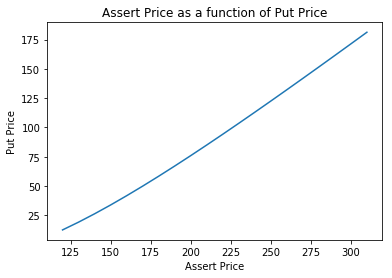

In [29]:
#plot the evolution of the put price as a function of the initial assert price S_0
assert_price = []
put_price = []
for i in range(20):
    S = 120 + i*10
    assert_price.append(S)
    V = black_scholes(S, 120, 0.05, 1)
    put_price.append(V)

plt.plot(assert_price, put_price)
plt.title("Assert Price as a function of Put Price")
plt.xlabel("Assert Price")
plt.ylabel("Put Price")

Text(0, 0.5, 'Delta')

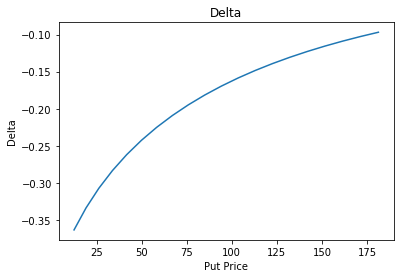

In [32]:
#plot the delta for this put
def delta(S, K, r, t):
    '''
    Where S is the current stock price
    K is the strike prices
    r is the risk-free interest rate
    t is the time to maturity
    under a Normal distribution
    '''
    v = 0.2 #set volatility at 20% for our problem
    
    d1 = (np.log(S/K)+((r+(v**2)/2)*t)/(v*np.sqrt(t)))
    
    return -norm.cdf(-d1)

deltas = []
for i in range(20):
    S = 120 + i*10
    D = delta(S, 120, 0.05, 1)
    deltas.append(D)

plt.plot(put_price, deltas)
plt.title("Delta")
plt.xlabel("Put Price")
plt.ylabel("Delta")

Text(0, 0.5, 'Gamma')

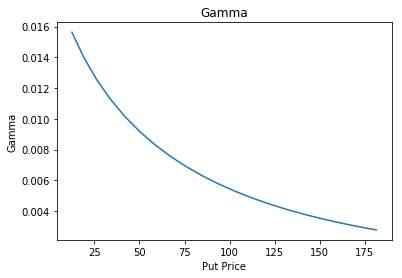

In [33]:
#plot the gamma for this put
def gamma(S,K,r,t):
    '''
    Where S is the current stock price
    K is the strike prices
    r is the risk-free interest rate
    t is the time to maturity
    under a Normal distribution
    '''
    v = 0.2 #set volatility at 20% for our problem
    
    d1 = (np.log(S/K)+((r+(v**2)/2)*t)/(v*np.sqrt(t)))
    
    probd = 1/np.sqrt(2*np.pi)*np.exp((-d1**2)*0.5)
    
    return probd/(S*v*np.sqrt(t))

gammas = []
for i in range(20):
    S = 120 + i*10
    G = gamma(S, 120, 0.05, 1)
    gammas.append(G)

plt.plot(put_price, gammas)
plt.title("Gamma")
plt.xlabel("Put Price")
plt.ylabel("Gamma")

# TODO: make comments about the graph

# Additional questions
Suppose the asset price is at $S_{0} = 100$ and we sell $1000$ puts.
* We want to be $\Delta$-neutralized, which position should we have?

* Suppose the price at time $\epsilon$ is $105$, what is the payoff strategy?

* What about $95$?

In [35]:
#First determine the delta at price 100, and the gamma
print(delta(100,120,0.05,1))
print(gamma(100,120,0.05,1))

-0.43341812794412327
0.019668658741831737


"We want to be $\Delta$-neutralized, which position should we have?"

- Since the delta is $-0.433$ and we sell $1000$ puts, to hedge this delta we need to buy $1000*0.433 = 433$ shares

"Suppose the price goes to $105$"

- Since the gamma is at $0.019$ that means for every dollar the price changes ($105-100 = 5$) the delta changes by $0.019$. This insinuates that the delta will change by $5*0.019=0.095$. That would cause the delta to now be at $-0.43341812794412327+0.095=-0.33841812794$. That means that we would now only need $1000*0.338=338$ shares, and we can sell $433-338=105$ shares.

"What about 95?"

- Since the gamma is at $0.019$, the delta will change by $-0.095$. That would cause the delta to now be at $-0.52841812794$. This means we would need $1000*0.528=528$ shares, and we will need to buy $528-433=95$ shares.